<a href="https://colab.research.google.com/github/OdinProjectI/ODIN/blob/main/CasualtiesOfWarInAfghanistan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Casualties of War in Afghanistan**
1. Exploring Civilian Casualties
    - Fatalities by Area
    - Fatalities by Types (Civilian v.s Non-civilian)
2. Forecasting Casualties

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/SpecialForces_Badge.svg/1024px-SpecialForces_Badge.svg.png" width='500px' style="text-align:center">

In [20]:
import pandas as pd
import numpy as np
import warnings
import os

import seaborn as sns
import matplotlib.pyplot as plt

from typing import List, Dict
warnings.filterwarnings('ignore')

In [4]:
afghan_df: 'DataFrame' = pd.read_csv(os.environ['DATASET'])
afghan_df['event_date'] = pd.to_datetime(afghan_df['event_date'])
afghan_df['is_civilian_fatality'] = afghan_df['civilian_targeting'].replace({'Civilian targeting': 1, np.nan:0})
pd.options.display.max_columns = afghan_df.shape[1]

In [18]:
afghan_df.head(5)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,AFG66781,2023-07-13,2023,1,Political violence,Battles,Armed clash,Military Forces of Afghanistan (2021-),NaN,1,Military Forces of Afghanistan (2021-),NaN,1,11,NaN,4,Caucasus and Central Asia,Afghanistan,Nangarhar,Kama,NaN,Kama,34.4432,70.6565,2,Hasht-e Subh,National,"On 13 July 2023, a Taliban commander and the K...",0,NaN,1689690645
1,AFG66784,2023-07-13,2023,1,Political violence,Battles,Armed clash,Unidentified Armed Group (Afghanistan),NaN,3,TTP: Tehreek-i-Taliban Pakistan,NaN,2,23,NaN,4,Caucasus and Central Asia,Afghanistan,Paktika,Sharan,NaN,Sharan,33.1757,68.7304,1,Hasht-e Subh,National,"On 13 July 2023, one Tehreek-i-Taliban Pakista...",1,NaN,1689690645
2,AFG66796,2023-07-13,2023,2,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Afghanistan (2021-),NaN,1,Unidentified Armed Group (Afghanistan),NaN,3,13,NaN,4,Caucasus and Central Asia,Afghanistan,Balkh,Mazar-e-Sharif,NaN,Mazar-e-Sharif,36.7090,67.1109,3,Afghan Islamic Press News Agency,National,"Weapons seizure: Around 13 July 2023, Taliban ...",0,NaN,1689690645
3,AFG66802,2023-07-12,2023,2,Strategic developments,Strategic developments,Other,Government of Afghanistan (2021-),NaN,1,Civilians (Afghanistan),Teachers (Afghanistan); Students (Afghanistan),7,17,NaN,4,Caucasus and Central Asia,Afghanistan,Kabul,Kabul,NaN,Kabul,34.5167,69.1833,1,Independent Persian; Twitter; Zawia News,New media-Subnational,"Other: Around 12 July 2023 (as reported), the ...",0,NaN,1689690645
4,AFG66803,2023-07-12,2023,1,Strategic developments,Strategic developments,Other,Unidentified Armed Group (Afghanistan),NaN,3,Civilians (Afghanistan),NaN,7,37,NaN,4,Caucasus and Central Asia,Afghanistan,Nangarhar,Deh Bala,NaN,Deh Bala,34.0923,70.4690,2,Afghan Islamic Press News Agency; Etilaat e Ro...,National-International,"Explosive remnants of war: On 12 July 2023, tw...",2,NaN,1689690645


In [34]:
mean_fatalities: float = afghan_df['fatalities'].mean()
median_fatalities: float = afghan_df['fatalities'].median()

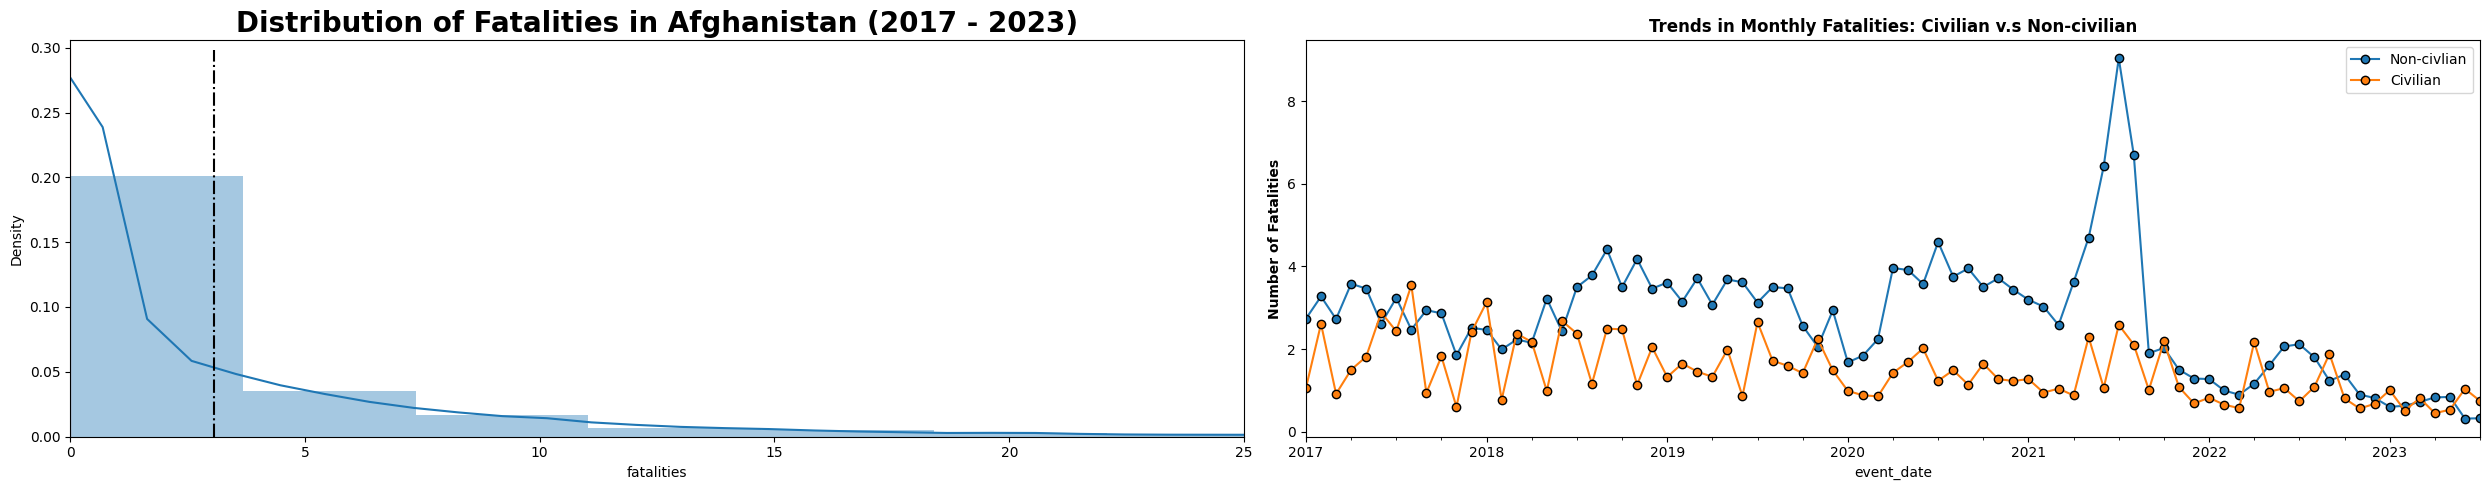

In [71]:
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(1,2,1)
sns.distplot(afghan_df['fatalities'], ax=ax)
ax.set_title("Distribution of Fatalities in Afghanistan (2017 - 2023)", fontweight='bold', fontsize=20)
ax.set_xlim([0,25])

ax.axvline(mean_fatalities,
           ymin=0.0,
           ymax=0.975,
           label=f"Mean Fatalties: {mean_fatalities:.2f}",
           linestyle="-.",
           color='black')

ax.axvline(median_fatalities,
           ymin=0.0,
           ymax=0.975,
           label=f"Median Fatalties: {median_fatalities:.2f}",
           linestyle="solid",
           color='red')


ax = fig.add_subplot(1,2,2)
afghan_df.groupby(['event_date', 'is_civilian_fatality'])['fatalities'].mean().unstack("is_civilian_fatality").replace({np.nan:0.0}).rename({0.0: 'Non-civlian', 1.0: 'Civilian'}, axis=1).resample('M').mean().plot(marker='o', mec='black', ax=ax)
ax.set_title("Trends in Monthly Fatalities: Civilian v.s Non-civilian", fontweight='bold')
ax.set_ylabel("Number of Fatalities", fontweight='bold')

ax.legend()

plt.tight_layout()